In [2]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [4]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [5]:
images_tilapia="Tilapia"
results = search_images_ddg(images_tilapia)
print(results)
ims = results.attrgot('contentUrl')
len(ims)
print (ims)

['https://www.bdoutdoors.com/forums/attachments/tilapia-jpg.1146208/', 'https://teakdoor.com/Gallery/albums/userpics/10004/tilapia.gif', 'https://thumbnails.yayimages.com/1600/0/a1e/a1e723.jpg', 'https://2.bp.blogspot.com/-BRYWETZ9TOQ/Vw9AXXQ5IOI/AAAAAAAABnI/NFYM44xyX7Iv2rYyBe9EWH40uA86rY4_wCLcB/s1600/Tilapia.jpg', 'https://www.siscofoods.com/wp-content/uploads/2020/08/Tilapia.jpg', 'https://fisheries.tamu.edu/files/2013/10/tilapia-3-300x140.jpg', 'https://eatingrichly.com/wp-content/uploads/2011/08/tilapia-recipe.jpg', 'https://i.pinimg.com/originals/e0/3c/d3/e03cd3f813bc2974c1b346271c159c92.jpg', 'http://2.bp.blogspot.com/-Xv3mUomFlyc/TyXcqnHjsgI/AAAAAAAAAEI/OA5RVo-eyrM/s1600/Tilapia+%281%29.jpg', 'https://portablefarms.com/wp-content/uploads/2017/11/0-18-tilapia-swimming-aquaponics.jpg', 'https://www.business.qld.gov.au/__data/assets/image/0020/251507/Tilapia-five-re.jpg', 'https://viande.com.br/wp-content/uploads/2020/06/tilapia.jpg', 'http://2.bp.blogspot.com/-wuhHUBf5tBs/UAY-zKgf

You should have now downloaded successfull images from Duck Duck Go (ddg)

**NB**: there's no way to be sure exactly what images a search like this will find. The results can change over time. We've heard of at least one case of a community member who found some unpleasant pictures of dead bears in their search results. You'll receive whatever images are found by the web search engine. If you're running this at work, or with kids, etc, then be cautious before you display the downloaded images.

Let's look at one:

In [6]:
#hide
ims = ['http://2.bp.blogspot.com/-pzFN-_XuOUg/UWQdJEG9C1I/AAAAAAAAAXE/Qj0ZMv4oZ8g/s1600/Til%C3%A1pia.jpg']

In [7]:
dest = f"images/{images_tilapia}"
download_url(ims[0], dest)

Path('images/Tilapia')

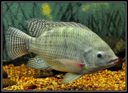

In [8]:
im = Image.open(dest)
im.to_thumb(128,128)

This seems to have worked nicely, so let's use fastai's `download_images` to download all the URLs for each of our search terms. We'll put each in a separate folder:

In [9]:
marineLife = 'tilapia','sea cucumber','penaeus mondodon' #, 'mussel', 'milk fish'
path = Path('marineLife')
print (path)

marineLife


In [9]:
!pwd

if not path.exists():
    path.mkdir()
    print (path)

for o in marineLife:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    print(f"searching for {o} in {dest}")
    #results = search_images_ddg(f'{o}')
    results = search_images_ddg(f"{o} alive in water")
    print ('destination:'+str(dest))
    print(results)
    #download_images(dest, urls=results.attrgot('contentUrl'))
    download_images(dest, urls=results  )

/home/redhat/git/SmartAquaculture/smartAquaculture
marineLife
searching for tilapia in marineLife/tilapia


destination:marineLife/tilapia
['https://image.shutterstock.com/image-photo/alive-tilapia-fish-260nw-780663766.jpg', 'https://thumbs.dreamstime.com/b/red-tilapia-fish-thailand-216208288.jpg', 'https://scx2.b-cdn.net/gfx/news/2018/tilapia.jpg', 'https://www.bigcatchflorida.com/media/1169/bluetilapia.jpg', 'https://www.globalseafood.org/wp-content/uploads/2018/07/FRIMPONG-Pic-0.jpg', 'https://www.floridamuseum.ufl.edu/wp-content/uploads/sites/66/2020/02/Plate-207_2.jpg', 'https://www.aquaponicsusa.com/products/images/aquaponics-tilapia-for-sale/Tilapia%20Mating@2x.jpg', 'https://images.assetsdelivery.com/compings_v2/ammit/ammit1307/ammit130700025.jpg', 'http://2.bp.blogspot.com/-C74q865JeC8/UAY-wv_szvI/AAAAAAAAATQ/r3x07A42Zfo/s1600/456895_10151007766603331_1833233038_o.jpg', 'https://images.thefishsite.com/fish/articles/tilapia-3-fai-brazilcredit-hideyoshi.png?profile=article-full', 'https://www.aquaculturenorthamerica.com/wp-content/uploads/2022/12/AdobeStock_545070947.jpg', 'https://ww

Our folder has image files, as we'd expect:

In [10]:
fns = get_image_files(path)
fns

(#660) [Path('marineLife/tilapia/edcf7918-7099-47a9-993d-1eb5c2ffc2d8.jpg'),Path('marineLife/tilapia/6efb21f9-162e-43c1-99c2-72a823ac7db4.jpg'),Path('marineLife/tilapia/604912fc-615f-4051-9424-07a800c8a38d.jpg'),Path('marineLife/tilapia/fe33615c-c860-49b6-bb1a-b7c34bbc33ca.png'),Path('marineLife/tilapia/dee80b47-626e-4790-850e-2b7fe2000840.jpg'),Path('marineLife/tilapia/77d41bbd-e76b-4b39-9e68-6cb598e20a9f.jpg'),Path('marineLife/tilapia/c88fd3d3-4d83-4a6b-a68a-20d76f1976ea.jpg'),Path('marineLife/tilapia/af617d36-5d35-4b2d-83d1-67272fe83db3.jpg'),Path('marineLife/tilapia/e1629d43-74c9-42f6-9a12-b9ea87b41072.jpg'),Path('marineLife/tilapia/47f41af0-6c06-41c8-b0d4-26198b1b8a20.jpg')...]

Often when we download files from the internet, there are a few that are corrupt. Let's check:

In [11]:
??verify_images

Signature: verify_images(fns)
Source:   
def verify_images(fns):
    "Find images in `fns` that can't be opened"
    return L(fns[i] for i,o in enumerate(parallel(verify_image, fns)) if not o)
File:      ~/git/SmartAquaculture/smartAcqua/lib64/python3.12/site-packages/fastai/vision/utils.py
Type:      function

In [12]:
failed = verify_images(fns)
failed

(#0) []

To remove all the failed images, you can use `unlink` on each of them. Note that, like most fastai functions that return a collection, `verify_images` returns an object of type `L`, which includes the `map` method. This calls the passed function on each element of the collection:

In [13]:
failed.map(Path.unlink);

## From Data to DataLoaders

`DataLoaders` is a thin class that just stores whatever `DataLoader` objects you pass to it, and makes them available as `train` and `valid`. Although it's a very simple class, it's very important in fastai: it provides the data for your model. The key functionality in `DataLoaders` is provided with just these four lines of code (it has some other minor functionality we'll skip over for now):

```python
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])
```

> jargon: DataLoaders: A fastai class that stores multiple `DataLoader` objects you pass to it, normally a `train` and a `valid`, although it's possible to have as many as you like. The first two are made available as properties.

 the `Dataset` and `Datasets` classes, which have the same relationship.

To turn our downloaded data into a `DataLoaders` object we need to tell fastai at least four things:

- What kinds of data we are working with
- How to get the list of items
- How to label these items
- How to create the validation set

So far we have seen a number of *factory methods* for particular combinations of these things, which are convenient when you have an application and data structure that happen to fit into those predefined methods. For when you don't, fastai has an extremely flexible system called the *data block API*. With this API you can fully customize every stage of the creation of your `DataLoaders`. Here is what we need to create a `DataLoaders` for the dataset that we just downloaded:

In [14]:
??get_image_files
??parent_label

Signature: parent_label(o)
Source:   
def parent_label(o):
    "Label `item` with the parent folder name."
    return Path(o).parent.name
File:      ~/git/SmartAquaculture/smartAcqua/lib64/python3.12/site-packages/fastai/data/transforms.py
Type:      function

In [15]:
marineLifeDataBlock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

Let's look at each of these arguments in turn. First we provide a tuple where we specify what types we want for the independent and dependent variables: 

```python
blocks=(ImageBlock, CategoryBlock)
```

The *independent variable* is the thing we are using to make predictions from, and the *dependent variable* is our target. In this case, our independent variables are images, and our dependent variables are the categories (type of marine life) for each image. We will see many other types of block in the rest of this book.

For this `DataLoaders` our underlying items will be file paths. We have to tell fastai how to get a list of those files. The `get_image_files` function takes a path, and returns a list of all of the images in that path (recursively, by default):

```python
get_items=get_image_files
```

Often, datasets that you download will already have a validation set defined. Sometimes this is done by placing the images for the training and validation sets into different folders. Sometimes it is done by providing a CSV file in which each filename is listed along with which dataset it should be in. There are many ways that this can be done, and fastai provides a very general approach that allows you to use one of its predefined classes for this, or to write your own. In this case, however, we simply want to split our training and validation sets randomly. However, we would like to have the same training/validation split each time we run this notebook, so we fix the random seed (computers don't really know how to create random numbers at all, but simply create lists of numbers that look random; if you provide the same starting point for that list each time—called the *seed*—then you will get the exact same list each time):


```python
splitter=RandomSplitter(valid_pct=0.2, seed=42)
```

The independent variable is often referred to as `x` and the dependent variable is often referred to as `y`. Here, we are telling fastai what function to call to create the labels in our dataset:

```python
get_y=parent_label
```

`parent_label` is a function provided by fastai that simply gets the name of the folder a file is in. Because we put each of our marine lives images into folders based on the type of marine lives, this is going to give us the labels that we need.

Our images are all different sizes, and this is a problem for deep learning: we don't feed the model one image at a time but several of them (what we call a *mini-batch*). To group them in a big array (usually called a *tensor*) that is going to go through our model, they all need to be of the same size. So, we need to add a transform which will resize these images to the same size. *Item transforms* are pieces of code that run on each individual item, whether it be an image, category, or so forth. fastai includes many predefined transforms; we use the `Resize` transform here:

```python
item_tfms=Resize(128)
```

This command has given us a `DataBlock` object. This is like a *template* for creating a `DataLoaders`. We still need to tell fastai the actual source of our data—in this case, the path where the images can be found:

In [16]:
print(path)
dls = marineLifeDataBlock.dataloaders(path)

marineLife


A `DataLoaders` includes validation and training `DataLoader`s. `DataLoader` is a class that provides batches of a few items at a time to the GPU. We'll be learning a lot more about this class in the next chapter. When you loop through a `DataLoader` fastai will give you 64 (by default) items at a time, all stacked up into a single tensor. We can take a look at a few of those items by calling the `show_batch` method on a `DataLoader`:

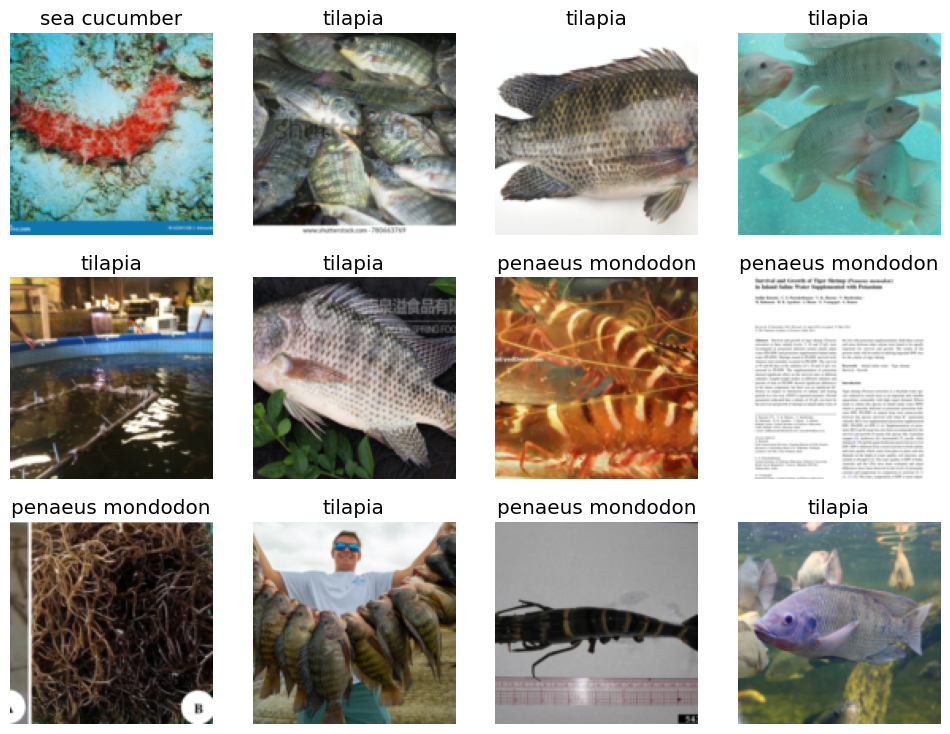

In [17]:
dls.valid.show_batch(max_n=12, nrows=3)

By default `Resize` *crops* the images to fit a square shape of the size requested, using the full width or height. This can result in losing some important details. Alternatively, you can ask fastai to pad the images with zeros (black), or squish/stretch them:

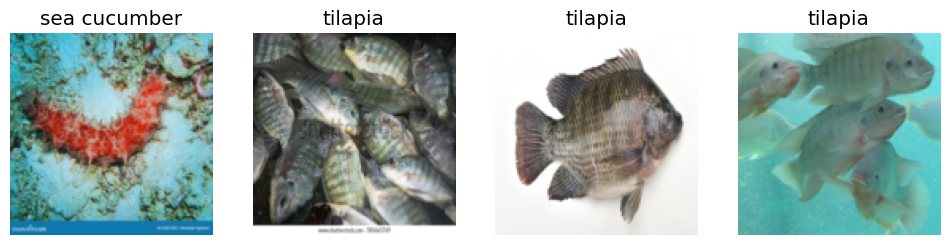

In [18]:
marineLife = marineLifeDataBlock.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = marineLifeDataBlock.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

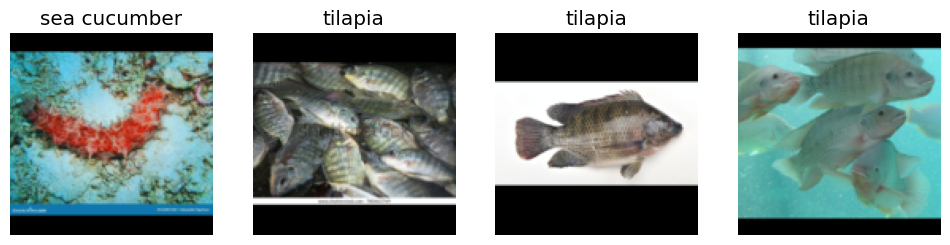

In [19]:
marineLife = marineLifeDataBlock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = marineLifeDataBlock.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

All of these approaches seem somewhat wasteful, or problematic. If we squish or stretch the images they end up as unrealistic shapes, leading to a model that learns that things look different to how they actually are, which we would expect to result in lower accuracy. If we crop the images then we remove some of the features that allow us to perform recognition. For instance, if we were trying to recognize breeds of dog or cat, we might end up cropping out a key part of the body or the face necessary to distinguish between similar breeds. If we pad the images then we have a whole lot of empty space, which is just wasted computation for our model and results in a lower effective resolution for the part of the image we actually use.

Instead, what we normally do in practice is to randomly select part of the image, and crop to just that part. On each epoch (which is one complete pass through all of our images in the dataset) we randomly select a different part of each image. This means that our model can learn to focus on, and recognize, different features in our images. It also reflects how images work in the real world: different photos of the same thing may be framed in slightly different ways.

In fact, an entirely untrained neural network knows nothing whatsoever about how images behave. It doesn't even recognize that when an object is rotated by one degree, it still is a picture of the same thing! So actually training the neural network with examples of images where the objects are in slightly different places and slightly different sizes helps it to understand the basic concept of what an object is, and how it can be represented in an image.

Here's another example where we replace `Resize` with `RandomResizedCrop`, which is the transform that provides the behavior we just described. The most important parameter to pass in is `min_scale`, which determines how much of the image to select at minimum each time:

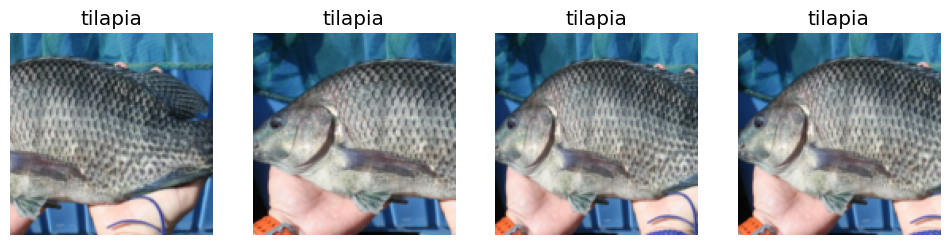

In [20]:
marineLife = marineLife.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = marineLife.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

We used `unique=True` to have the same image repeated with different versions of this `RandomResizedCrop` transform. This is a specific example of a more general technique, called data augmentation.

### Data Augmentation

*Data augmentation* refers to creating random variations of our input data, such that they appear different, but do not actually change the meaning of the data. Examples of common data augmentation techniques for images are rotation, flipping, perspective warping, brightness changes and contrast changes. For natural photo images such as the ones we are using here, a standard set of augmentations that we have found work pretty well are provided with the `aug_transforms` function. Because our images are now all the same size, we can apply these augmentations to an entire batch of them using the GPU, which will save a lot of time. To tell fastai we want to use these transforms on a batch, we use the `batch_tfms` parameter (note that we're not using `RandomResizedCrop` in this example, so you can see the differences more clearly; we're also using double the amount of augmentation compared to the default, for the same reason):

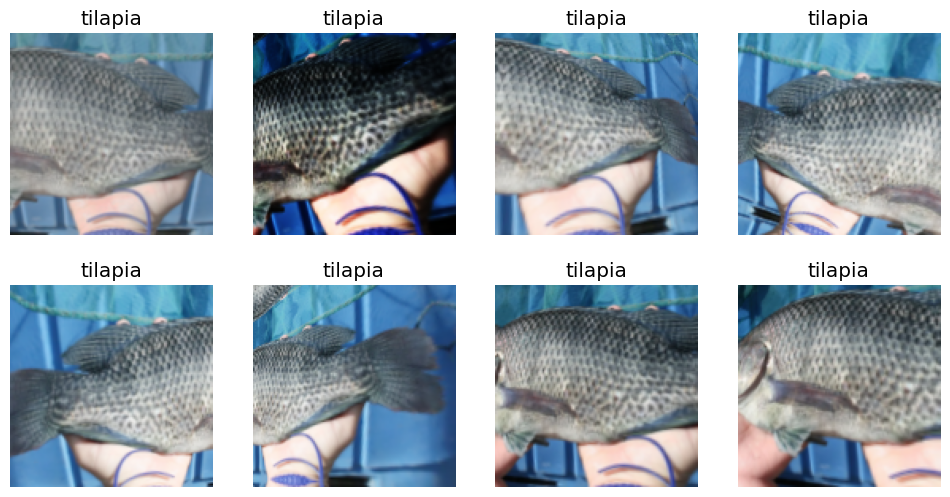

In [21]:
marineLife = marineLife.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = marineLife.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

Now that we have assembled our data in a format fit for model training, let's actually train an image classifier using it.

## Training Your Model, and Using It to Clean Your Data

Time to use the same lines of code as in <<chapter_intro>> to train our marine life classifier.

If we don't have a lot of data for our problem , so to train our model, we'll use `RandomResizedCrop` with an image size of 224 px, which is fairly standard for image classification, and default `aug_transforms`:

In [22]:
marineLife = marineLife.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = marineLife.dataloaders(path)



We can now create our `Learner` and fine-tune it in the usual way:

In [23]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.333277,0.236142,0.090909,01:35
1,0.239649,0.148414,0.060606,01:37
2,0.174911,0.118448,0.030303,01:29
3,0.145466,0.113322,0.037879,01:29


Now let's see what the mistakes the model is making. To visualize this, we can create a *confusion matrix*:

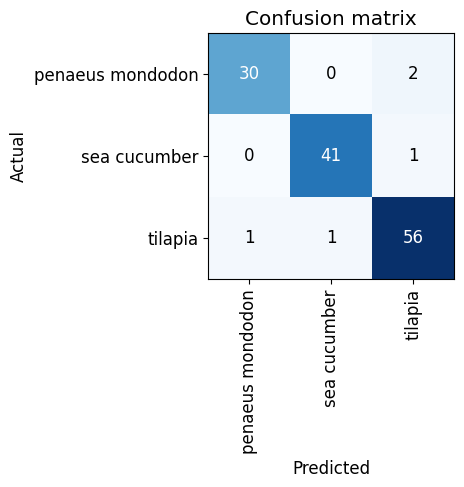

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

The rows represent all the marine life in our dataset, respectively.  Therefore, the diagonal of the matrix shows the images which were classified correctly, and the off-diagonal cells represent those which were classified incorrectly. This is one of the many ways that fastai allows you to view the results of your model. It is (of course!) calculated using the validation set. With the color-coding, the goal is to have white everywhere except the diagonal, where we want dark blue. 

It's helpful to see where exactly our errors are occurring, to see whether they're due to a dataset problem (e.g., images that aren't marine life, or are labeled incorrectly, etc.), or a model problem (perhaps it isn't handling images taken with unusual lighting, or from a different angle, etc.). To do this, we can sort our images by their *loss*.

The loss is a number that is higher if the model is incorrect (especially if it's also confident of its incorrect answer), or if it's correct, but not confident of its correct answer. In a couple of chapters we'll learn in depth how loss is calculated and used in the training process. For now, `plot_top_losses` shows us the images with the highest loss in our dataset. As the title of the output says, each image is labeled with four things: prediction, actual (target label), loss, and probability. The *probability* here is the confidence level, from zero to one, that the model has assigned to its prediction:

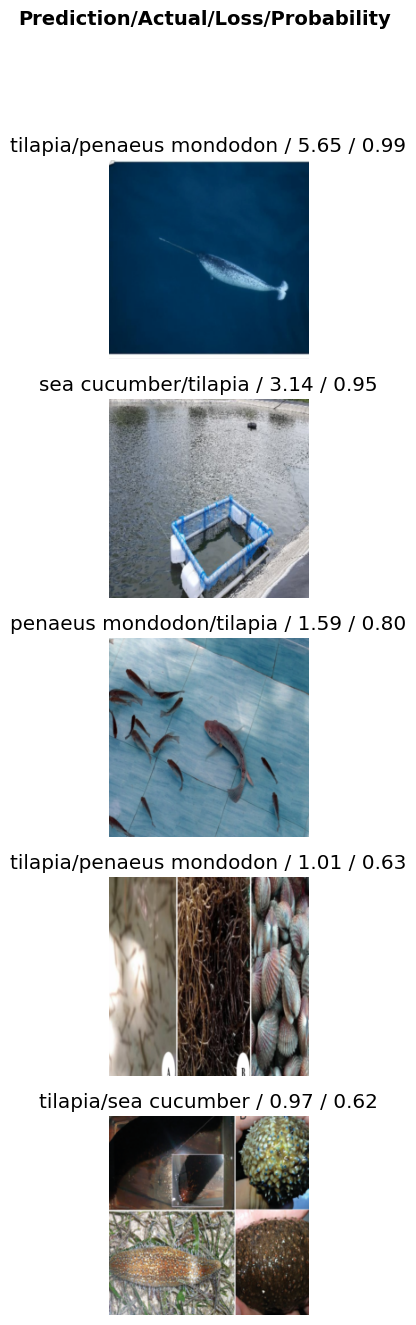

In [25]:
interp.plot_top_losses(5, nrows=5)

This output shows that the image with the highest loss is one that has been predicted as "tilapia" but with low confidence. 

The intuitive approach to doing data cleaning is to do it *before* you train a model. But as you've seen in this case, a model can actually help you find data issues more quickly and easily. So, we normally prefer to train a quick and simple model first, and then use it to help us with data cleaning.

fastai includes a handy GUI for data cleaning called `ImageClassifierCleaner` that allows you to choose a category and the training versus validation set and view the highest-loss images (in order), along with menus to allow images to be selected for removal or relabeling:

In [26]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

<img alt="Cleaner widget" width="700" src="images/att_00007.png">

In [27]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

So, if we choose `<Delete>` in the menu under this image. `ImageClassifierCleaner` doesn't actually do the deleting or changing of labels for you; it just returns the indices of items to change. So, for instance, to delete (`unlink`) all images selected for deletion, we would run:

```python
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
```

To move images for which we've selected a different category, we would run:

```python
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
```

> s: Cleaning the data and getting it ready for your model are two of the biggest challenges for data scientists; they say it takes 90% of their time. The fastai library aims to provide tools that make it as easy as possible.

We'll be seeing more examples of model-driven data cleaning throughout this book. Once we've cleaned up our data, we can retrain our model. Try it yourself, and see if your accuracy improves!

> Note: No Need for Big Data: After cleaning the dataset using these steps, we generally are seeing 100% accuracy on this task. We even see that result when we download a lot fewer images than the 150 per class we're using here. As you can see, the common complaint that _you need massive amounts of data to do deep learning_ can be a very long way from the truth!

Now that we have trained our model, let's see how we can deploy it to be used in practice.

In [28]:
### Using the Model for Inference
print(path)
learn.export()

marineLife
